daatset from : https://www.kaggle.com/mchirico/montcoalert

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_911calls=pd.read_excel("911.xlsx")

In [12]:
df_911calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null datetime64[ns]
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.8+ MB


Top 5 zipcodes for 911 Calls

In [30]:
df_911calls_zip=df_911calls['zip']
df_911calls_zip.dropna(inplace=True)
df_911calls_zip_int=pd.to_numeric(df_911calls_zip,downcast='integer')

In [31]:
df_911calls_zip_int.value_counts().head()

19401    6979
19464    6643
19403    4854
19446    4748
19406    3174
Name: zip, dtype: int64

Top 5 townships for 911 Calls

In [33]:
df_911calls['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Number of Unique Call title

In [34]:
df_911calls['title'].nunique()

110

Creating new feature for identifying the Reason  of call using title

In [38]:
df_911calls['reason']=df_911calls['title'].apply(lambda str1:str1.split(':')[0])
df_911calls['reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

Most coomon reason for 991 call

In [40]:
df_911calls['reason'].value_counts().head(1)

EMS    48877
Name: reason, dtype: int64

Visualization of reasons for 911 call

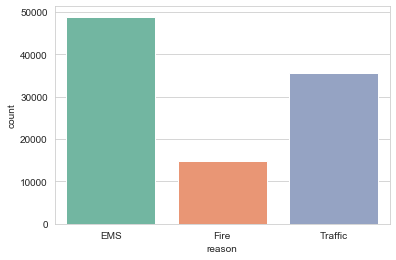

In [83]:
sns.set_style(style='whitegrid')
sns.countplot(x=df_911calls['reason'],palette='Set2')

Creating Hour,Month ,day of the week features (derived from timestamp)

In [49]:
df_911calls['timeStamp'].dtype

df_911calls['timeStamp']=df_911calls['timeStamp'].apply(pd.to_datetime)

In [90]:
def get_week_day(dtobj):
    lookup={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
    return lookup[dtobj.weekday()]

def get_month(dtobj):
    lookup={1:'January 2016',2:'Febuary 2016',3:'March 2016',4:'April 2016',5:'May 2016',6:'June 2016',7:'July 2016',8:'August 2016'
           ,9:'September',10:'October',11:'November',12:'December 2015'}
    return lookup[dtobj.month]

def get_hour(dtobj):
    return dtobj.hour

df_911calls['hour24']=df_911calls['timeStamp'].apply(get_hour)
df_911calls['week day']=df_911calls['timeStamp'].apply(get_week_day)
df_911calls['month']=df_911calls['timeStamp'].apply(get_month)

Visualization of  911 calls for each week day categorized by Reason

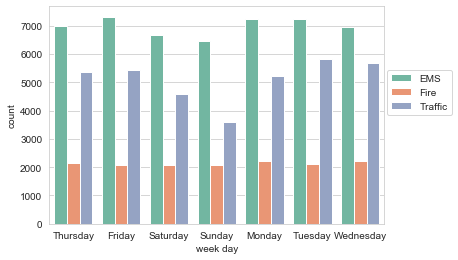

In [91]:
sns.countplot(x='week day',hue='reason',data=df_911calls,palette='Set2')
plt.legend(loc=(1.01,0.5))

Visualization of 911 calls for each month categorized by Reason

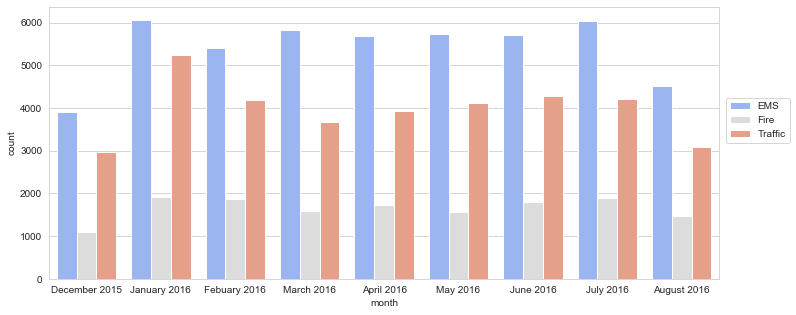

In [93]:
fig,axes=plt.subplots(figsize=(12,5))
sns.countplot(x='month',hue='reason',data=df_911calls,palette='coolwarm')
plt.legend(loc=(1.01,0.5))

Visualizing 911 calls by month in lineplot

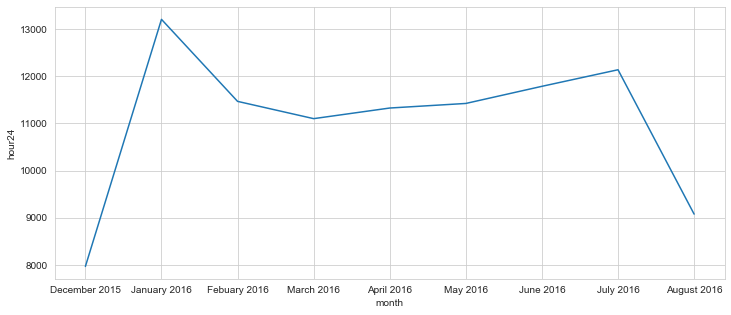

In [127]:
fig,axes=plt.subplots(figsize=(12,5))
df_911calls_gb=df_911calls.groupby('month').count()
df_911calls_gbtemp=df_911calls_gb.loc[['December 2015','January 2016','Febuary 2016','March 2016','April 2016','May 2016','June 2016','July 2016','August 2016']]
sns.lineplot(x=df_911calls_gbtemp.index,y='hour24',data=df_911calls_gbtemp,markers='*',sort=False)

creating a linear model of number of 911 calls by month

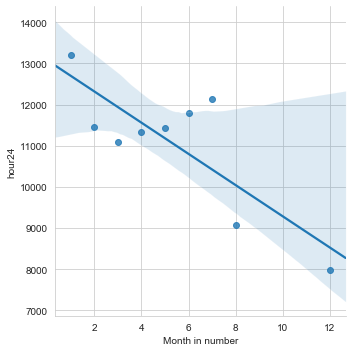

In [134]:
df_911calls_gbtemp['Month in number']=[12,1,2,3,4,5,6,7,8]
sns.lmplot(x='Month in number',y='hour24',data=df_911calls_gbtemp)

Creating daywise plot of 911 calls

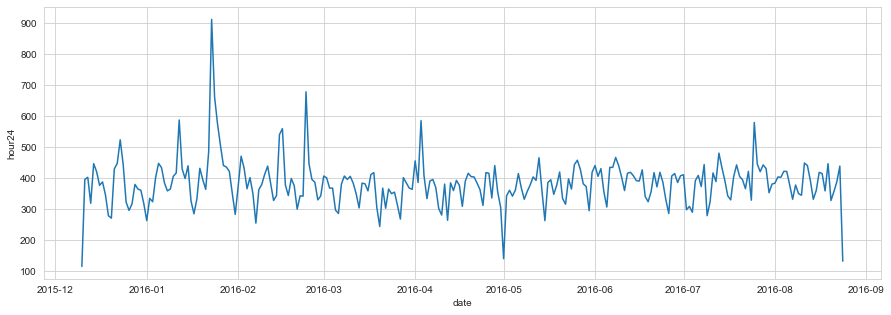

In [148]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
def get_date(dtobj):
    return dtobj.date()
df_911calls['date']=df_911calls['timeStamp'].apply(get_date)

fig,axes=plt.subplots(figsize=(15,5))
sns.lineplot(x=df_911calls.groupby('date').count().index,y='hour24',data=df_911calls.groupby('date').count())

Creating daywise plot of 911 calls by reasons

In [156]:
df_911calls_gb_date=df_911calls.groupby(['reason','date']).count()


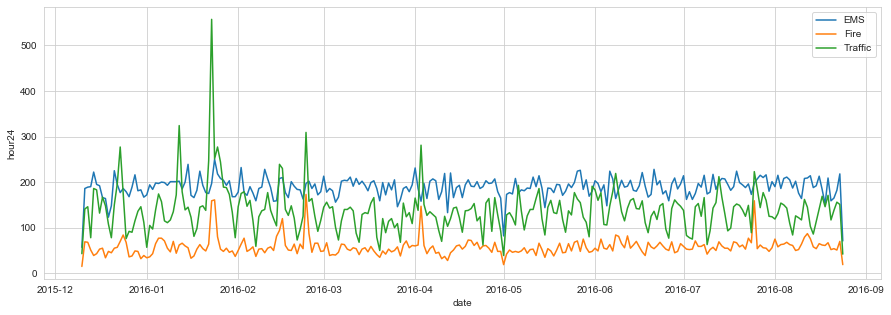

In [168]:
fig,axes=plt.subplots(figsize=(15,5))
sns.lineplot(x=df_911calls_gb_date.loc['EMS'].index,y='hour24',data=df_911calls_gb_date.loc['EMS'])
sns.lineplot(x=df_911calls_gb_date.loc['Fire'].index,y='hour24',data=df_911calls_gb_date.loc['Fire'])
sns.lineplot(x=df_911calls_gb_date.loc['Traffic'].index,y='hour24',data=df_911calls_gb_date.loc['Traffic'])
plt.legend(['EMS','Fire','Traffic'])

Heatmap of day of week vs  hour

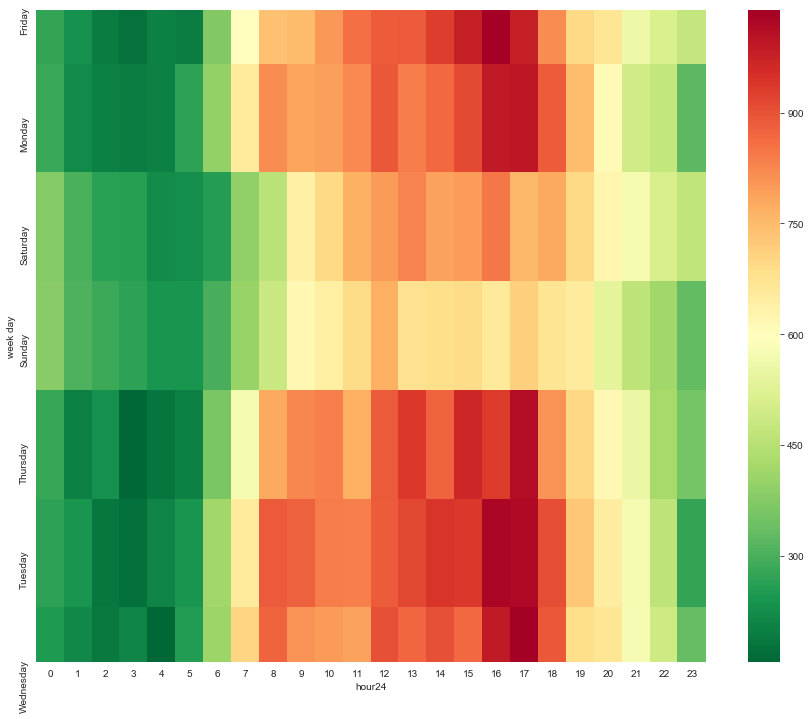

In [191]:
fig,axes=plt.subplots(figsize=(15,12))
sns.heatmap(df_911calls.pivot_table(columns='hour24',index='week day',values='e',aggfunc='count'),linecolor='black',cmap='RdYlGn_r')

clustering based on week day vs hour

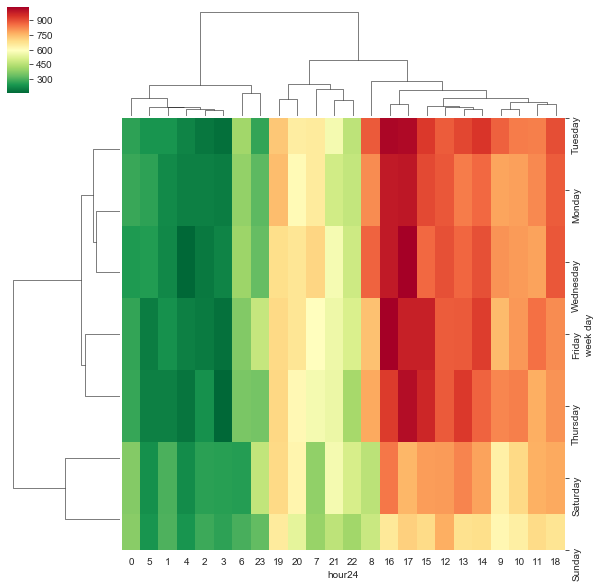

In [194]:
sns.clustermap(df_911calls.pivot_table(columns='hour24',index='week day',values='e',aggfunc='count'),linecolor='black',cmap='RdYlGn_r')

Heatmap of month vs week day

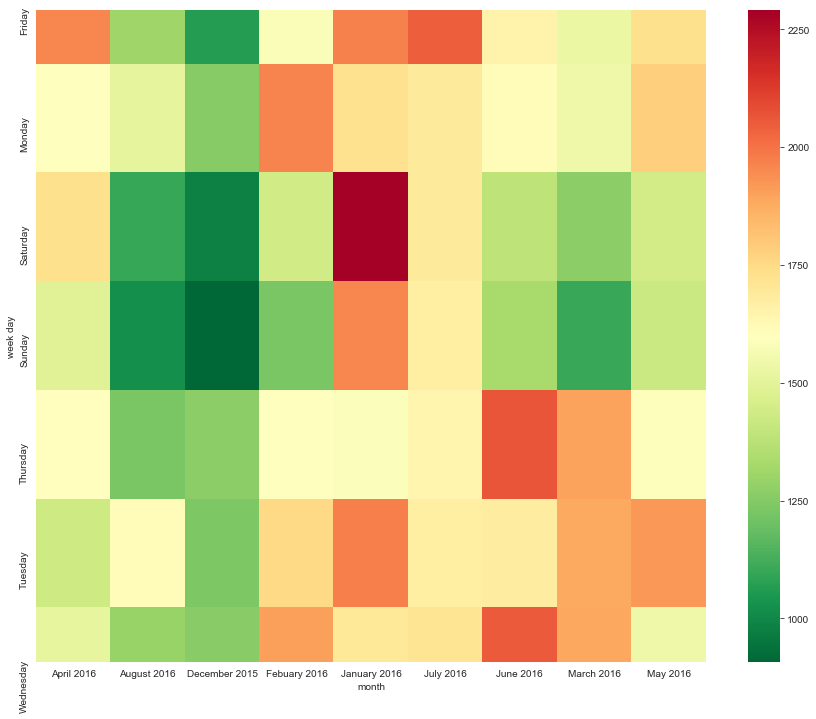

In [195]:
fig,axes=plt.subplots(figsize=(15,12))
sns.heatmap(df_911calls.pivot_table(columns='month',index='week day',values='e',aggfunc='count'),linecolor='black',cmap='RdYlGn_r')

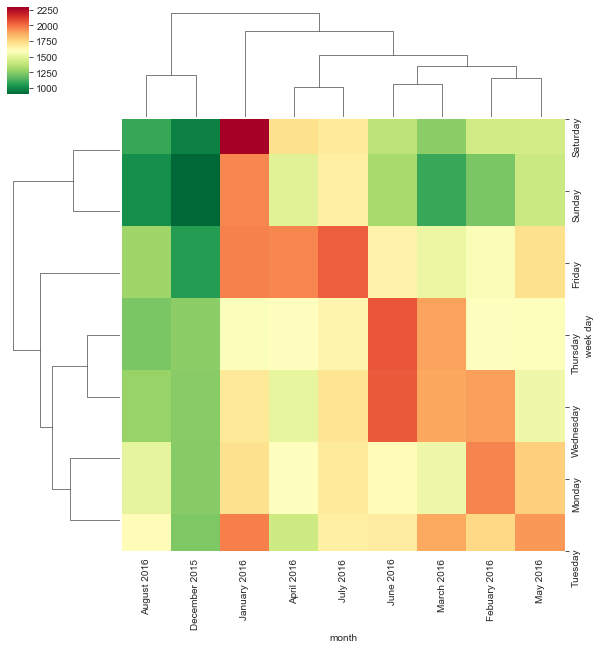

In [196]:
sns.clustermap(df_911calls.pivot_table(columns='month',index='week day',values='e',aggfunc='count'),linecolor='black',cmap='RdYlGn_r')